In [3]:
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
data = pd.read_csv('census.csv')
data.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [6]:
def class_converter(rotulo):
    if rotulo == ' >50K':
        return 1
    else:
        return 0

In [7]:
data['income'] = data['income'].apply(class_converter)

In [8]:
data.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [9]:
data['income'].unique()

array([0, 1], dtype=int64)

In [10]:
X = data.drop('income', axis = 1)

In [11]:
X.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [12]:
y = data['income']

In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [14]:
type(y)

pandas.core.series.Series

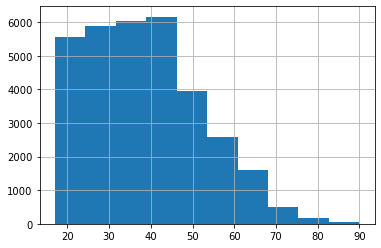

In [15]:
data.age.hist()

In [16]:
age = tf.feature_column.numeric_column('age')

In [17]:
age_category = [tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80,90])]

In [18]:
print(age_category)

[_BucketizedColumn(source_column=_NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80, 90))]


In [19]:
X.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [20]:
columns_categories = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex',
                           'native-country']

In [21]:
X['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [22]:
X['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [23]:
X['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [24]:
columns = [tf.feature_column.categorical_column_with_vocabulary_list(key = c, vocabulary_list=X[c].unique()) for c in columns_categories]

In [25]:
print(columns[3])

_VocabularyListCategoricalColumn(key='occupation', vocabulary_list=(' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair', ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct', ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces', ' Priv-house-serv'), dtype=tf.string, default_value=-1, num_oov_buckets=0)


In [26]:
numeric_columns = ['final-weight', 'education-num', 'capital-gain', 'capital-loos', 'hour-per-week']

In [27]:
numeric_columns = [ tf.feature_column.numeric_column(key = c) for c in numeric_columns ]

In [28]:
print(numeric_columns[1])

_NumericColumn(key='education-num', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


In [29]:
colunas = age_category + columns + numeric_columns

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [31]:
X_train.shape

(22792, 14)

In [32]:
X_test.shape

(9769, 14)

In [33]:
train_function = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train,
                                                        batch_size = 32, num_epochs = None, shuffle = True)

In [34]:
classifier = tf.estimator.LinearClassifier(feature_columns=colunas)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\JOELPI~1\\AppData\\Local\\Temp\\tmpare7ycfm', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020C06F32C50>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [35]:
classifier.train(input_fn=train_function, steps = 10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\JOELPI~1\AppData\Local\Temp\tmpare7ycfm\model.ckpt.
INFO:tensorflow:loss = 22.18071, step = 0
INFO:tensorflow:global_step/sec: 21.5384
INFO:tensorflow:loss = 4931.3867, step = 100 (4.649 sec)
INFO:tensorflow:global_step/sec: 18.6757
INFO:tensorflow:loss = 14127.2705, step = 200 (5.352 sec)
INFO:tensorflow:global_step/sec: 28.2811
INFO:tensorflow:loss = 7255.6123, step = 300 (3.534 sec)
INFO:tensorflow:global_step/sec: 28.3451
INFO:tensorflow:loss = 5286.3, step = 400 (3.528 sec)
INFO:tensorflow:global_step/sec: 30.0587
INFO:tensorflow:loss = 1197.8539, step = 500 (3.327 sec)
INFO:tensorflow:global_step/sec: 28.0672
INFO:tensorflow:loss = 9989.275, step = 600 (3.561 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:loss = 913.70374, step = 8000 (3.190 sec)
INFO:tensorflow:global_step/sec: 31.6443
INFO:tensorflow:loss = 518.28784, step = 8100 (3.159 sec)
INFO:tensorflow:global_step/sec: 30.5584
INFO:tensorflow:loss = 1832.1514, step = 8200 (3.274 sec)
INFO:tensorflow:global_step/sec: 31.2105
INFO:tensorflow:loss = 4903.1973, step = 8300 (3.203 sec)
INFO:tensorflow:global_step/sec: 31.3472
INFO:tensorflow:loss = 396.0597, step = 8400 (3.190 sec)
INFO:tensorflow:global_step/sec: 31.2641
INFO:tensorflow:loss = 1393.2063, step = 8500 (3.200 sec)
INFO:tensorflow:global_step/sec: 31.4654
INFO:tensorflow:loss = 156.85797, step = 8600 (3.177 sec)
INFO:tensorflow:global_step/sec: 30.2722
INFO:tensorflow:loss = 369.55875, step = 8700 (3.303 sec)
INFO:tensorflow:global_step/sec: 30.5538
INFO:tensorflow:loss = 209.79233, step = 8800 (3.272 sec)
INFO:tensorflow:global_step/sec: 31.3081
INFO:tensorflow:loss = 2325.9814, step = 8900 (3.194 sec)
INFO:tensorflow:global_step/sec: 31.4951
INFO:tensor

In [36]:
predict_function = tf.estimator.inputs.pandas_input_fn(x = X_test, batch_size = 32, shuffle = False)

In [37]:
predictions = classifier.predict(input_fn=predict_function)

In [38]:
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\JOELPI~1\AppData\Local\Temp\tmpare7ycfm\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-194.33319], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-134.57338], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-63.736862], dtype=float32),
  'logistic': array([2.0865677e-28], dtype=float32),
  'probabilities': array([1.0000000e+00, 2.0865677e-28], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-126.938446], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-309.70773], dtype=float32),
  'logistic': array([0

In [39]:
predictions_final = []
for p in classifier.predict(input_fn=predict_function):
    predictions_final.append(p['class_ids'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\JOELPI~1\AppData\Local\Temp\tmpare7ycfm\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [40]:
predictions_final

[array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([0], 

In [41]:

accuracy = accuracy_score(y_test, predictions_final)
accuracy

0.7954754836728427